In [26]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
from datetime import datetime

# Define weather api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)

In [4]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add it to a the list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Create an empty list to hold weater data
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval      ")
print("------------------------------")

# Create the counters
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the City.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each city.
    try:
        # Parse the json and retrieve the data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp, 
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | sapernoye
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | saint-georges
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | tieli
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | shaowu
Processing Record 19 of Set 1 | rio grande
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | albany
Processing 

Processing Record 38 of Set 4 | arrecife
Processing Record 39 of Set 4 | high level
Processing Record 40 of Set 4 | rosa zarate
Processing Record 41 of Set 4 | port-gentil
Processing Record 42 of Set 4 | shieli
Processing Record 43 of Set 4 | urumqi
Processing Record 44 of Set 4 | yakeshi
Processing Record 45 of Set 4 | lompoc
Processing Record 46 of Set 4 | vila franca do campo
Processing Record 47 of Set 4 | gulabpura
Processing Record 48 of Set 4 | kon tum
Processing Record 49 of Set 4 | vazante
Processing Record 50 of Set 4 | san policarpo
Processing Record 1 of Set 5 | magistralnyy
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | shar
Processing Record 4 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 5 of Set 5 | cap malheureux
Processing Record 6 of Set 5 | maceio
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | macapa
Processing Record 9 of Set 5 | nouadhibou
Processing Record 10 of Set 5 | hithadhoo
Processi

Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | kathmandu
Processing Record 35 of Set 8 | letlhakeng
Processing Record 36 of Set 8 | namibe
Processing Record 37 of Set 8 | werda
Processing Record 38 of Set 8 | golovchino
Processing Record 39 of Set 8 | dhidhdhoo
Processing Record 40 of Set 8 | luz
Processing Record 41 of Set 8 | denpasar
Processing Record 42 of Set 8 | dandong
Processing Record 43 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 45 of Set 8 | beloha
Processing Record 46 of Set 8 | alotau
City not found. Skipping...
Processing Record 47 of Set 8 | grove city
Processing Record 48 of Set 8 | lebowakgomo
Processing Record 49 of Set 8 | karaul
City not found. Skipping...
Processing Record 50 of Set 8 | nanortalik
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | mutoko
Processing Record 3 of Set 9 | kpandu
Processing Record 4 of Set 9 | angra


City not found. Skipping...
Processing Record 17 of Set 12 | tual
Processing Record 18 of Set 12 | yonibana
Processing Record 19 of Set 12 | asau
Processing Record 20 of Set 12 | tornio
Processing Record 21 of Set 12 | orange cove
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | halalo
City not found. Skipping...
Processing Record 24 of Set 12 | springbok
Processing Record 25 of Set 12 | rimouski
Processing Record 26 of Set 12 | katha
City not found. Skipping...
Processing Record 27 of Set 12 | puerto cabezas
Processing Record 28 of Set 12 | roma
Processing Record 29 of Set 12 | north bend
Processing Record 30 of Set 12 | awjilah
Processing Record 31 of Set 12 | toktogul
Processing Record 32 of Set 12 | nikolskoye-na-cheremshane
City not found. Skipping...
Processing Record 33 of Set 12 | berea
Processing Record 34 of Set 12 | worland
Processing Record 35 of Set 12 | sobolevo
Processing Record 36 of Set 12 | freeport
Processing Record 37 of Set 12 | kalmunai


In [6]:
# number of cities retrieved 
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.03,
  'Max Temp': 82.81,
  'Humidity': 73,
  'Cloudiness': 84,
  'Wind Speed': 13.04,
  'Country': 'PF',
  'Date': '2020-04-17 03:31:28'},
 {'City': 'Lebu',
  'Lat': -37.62,
  'Lng': -73.65,
  'Max Temp': 55.99,
  'Humidity': 82,
  'Cloudiness': 79,
  'Wind Speed': 8.72,
  'Country': 'CL',
  'Date': '2020-04-17 03:31:28'},
 {'City': 'Kapaa',
  'Lat': 22.08,
  'Lng': -159.32,
  'Max Temp': 80.6,
  'Humidity': 69,
  'Cloudiness': 20,
  'Wind Speed': 12.75,
  'Country': 'US',
  'Date': '2020-04-17 03:31:29'},
 {'City': 'Jamestown',
  'Lat': 42.1,
  'Lng': -79.24,
  'Max Temp': 30.2,
  'Humidity': 86,
  'Cloudiness': 20,
  'Wind Speed': 5.82,
  'Country': 'US',
  'Date': '2020-04-17 03:29:32'},
 {'City': 'Dikson',
  'Lat': 73.51,
  'Lng': 80.55,
  'Max Temp': 2.39,
  'Humidity': 90,
  'Cloudiness': 4,
  'Wind Speed': 9.33,
  'Country': 'RU',
  'Date': '2020-04-17 03:31:29'},
 {'City': 'East London',
  'Lat': -33.02,
  'Lng': 27.91,
  'Max Te

In [7]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.80,-139.03,82.81,73,84,13.04,PF,2020-04-17 03:31:28
1,Lebu,-37.62,-73.65,55.99,82,79,8.72,CL,2020-04-17 03:31:28
2,Kapaa,22.08,-159.32,80.60,69,20,12.75,US,2020-04-17 03:31:29
3,Jamestown,42.10,-79.24,30.20,86,20,5.82,US,2020-04-17 03:29:32
4,Dikson,73.51,80.55,2.39,90,4,9.33,RU,2020-04-17 03:31:29


In [8]:
# Reorder the columns
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-04-17 03:31:28,-9.80,-139.03,82.81,73,84,13.04
1,Lebu,CL,2020-04-17 03:31:28,-37.62,-73.65,55.99,82,79,8.72
2,Kapaa,US,2020-04-17 03:31:29,22.08,-159.32,80.60,69,20,12.75
3,Jamestown,US,2020-04-17 03:29:32,42.10,-79.24,30.20,86,20,5.82
4,Dikson,RU,2020-04-17 03:31:29,73.51,80.55,2.39,90,4,9.33


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

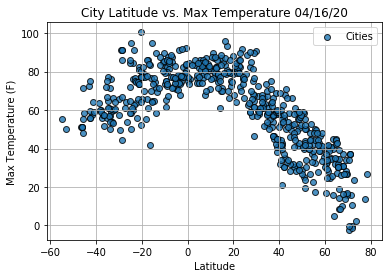

In [11]:
# Build a scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show the plot.
plt.show()

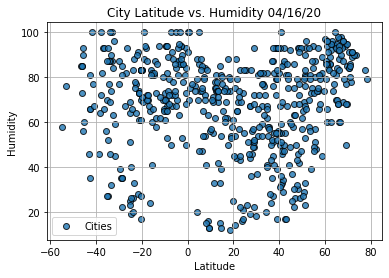

In [12]:
# Build a scatter plot for latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show the plot.
plt.show()

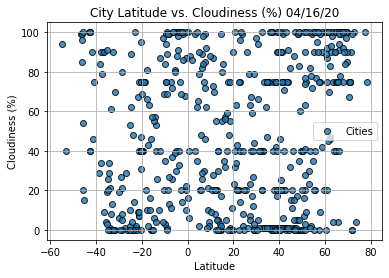

In [13]:
# Build a scatter plot for latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show the plot.
plt.show()

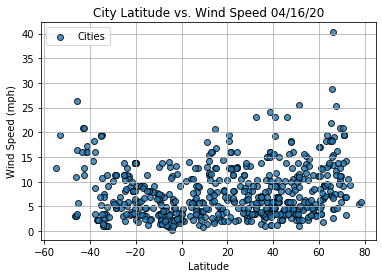

In [14]:
# Build a scatter plot for latitude vs. wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=.8,
           label="Cities")

# Titles and labels
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.legend()
plt.grid()

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show the plot.
plt.show()

In [15]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation for the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the line regression.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="red")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"r-value is {r_value}")

In [16]:
# Create the Northern and Southern hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2020-04-17 03:31:28,-9.80,-139.03,82.81,73,84,13.04
1,Lebu,CL,2020-04-17 03:31:28,-37.62,-73.65,55.99,82,79,8.72
5,East London,ZA,2020-04-17 03:31:30,-33.02,27.91,53.60,100,0,3.36
6,Bengkulu,ID,2020-04-17 03:31:24,-3.80,102.27,77.56,87,100,6.58
7,Port Alfred,ZA,2020-04-17 03:31:30,-33.59,26.89,59.00,74,8,1.01


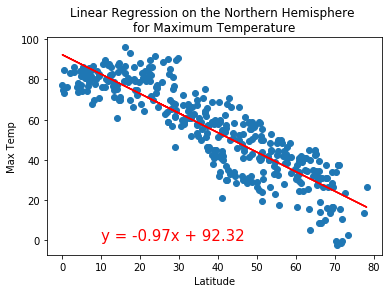

r-value is -0.8817306767105952


In [17]:
# Linear regression on the Northern Hemisphere Temps
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor Maximum Temperature", 
                       "Max Temp", 
                       (10,0))

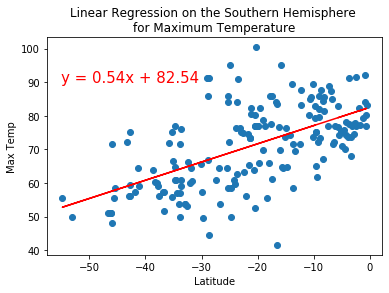

r-value is 0.5941992556263175


In [18]:
# Linear regression on the Souther Hemisphere Temps
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \nfor Maximum Temperature", 
                       "Max Temp", 
                       (-55,90))

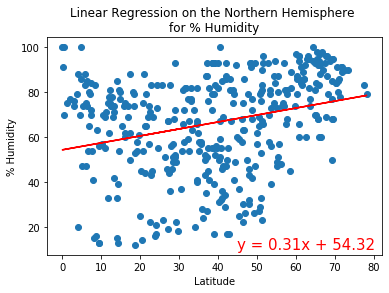

r-value is 0.281365496509592


In [19]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor % Humidity", 
                       "% Humidity", 
                       (45,10))

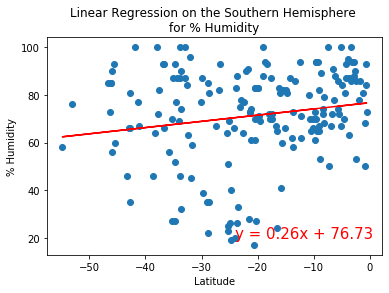

r-value is 0.17211049292452962


In [20]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \nfor % Humidity", 
                       "% Humidity", 
                       (-24,20))

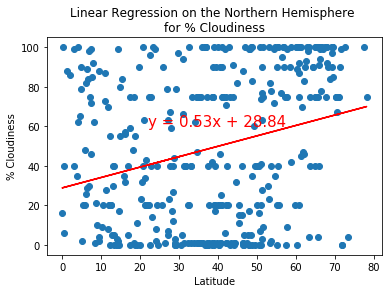

r-value is 0.27639867532707224


In [21]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor % Cloudiness", 
                       "% Cloudiness", 
                       (22,60))

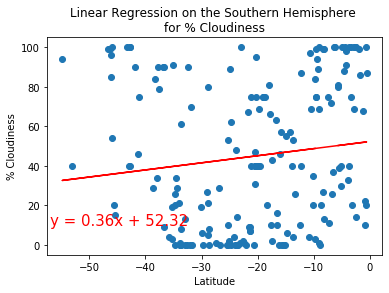

r-value is 0.13008098752360153


In [22]:
# Linear regression on the Southern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \nfor % Cloudiness", 
                       "% Cloudiness", 
                       (-57,10))

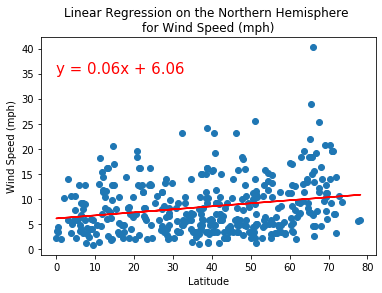

r-value is 0.21947288176991953


In [23]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Northern Hemisphere \nfor Wind Speed (mph)", 
                       "Wind Speed (mph)", 
                       (0,35))

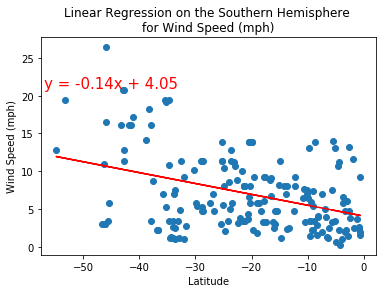

r-value is -0.3783810745417202


In [24]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, 
                       "Linear Regression on the Southern Hemisphere \nfor Wind Speed (mph)", 
                       "Wind Speed (mph)", 
                       (-57,21))